In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA 
import pylab as pl 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc 

In [19]:
df = pd.read_csv('./CC GENERAL.csv')
df = df.drop('CUST_ID', axis= 1)

In [20]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [22]:
df.shape

(8950, 17)

In [23]:
df = df.dropna()

In [24]:
df.shape

(8636, 17)

In [25]:
df1 = df.drop_duplicates().reset_index(drop=True)
df = df1

In [26]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
3,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
4,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [27]:
scaler = StandardScaler()
from sklearn.preprocessing import normalize
df_normalised = scaler.fit_transform(df)
df_normalised = normalize(df_normalised)

In [28]:
df = pd.DataFrame(df_normalised, columns = df.columns)

In [29]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.311806,-0.154954,-0.179717,-0.150396,-0.148581,-0.196246,-0.343691,-0.287374,-0.300313,-0.285562,-0.200761,-0.216751,-0.403071,-0.227772,-0.127929,-0.225169,0.148729
1,0.215652,0.019100,-0.133545,-0.101359,-0.129489,0.724875,-0.348852,-0.193676,-0.261474,0.157198,0.028012,-0.168495,0.191114,0.224880,0.024747,0.059936,0.100236
2,0.121694,0.144174,-0.033208,0.028501,-0.130890,-0.133690,0.358313,0.754993,-0.264303,-0.194536,-0.136766,-0.034365,0.232162,-0.113964,-0.028500,-0.153394,0.101320
3,-0.156537,0.211587,-0.195017,-0.146385,-0.192092,-0.196202,-0.430561,-0.171033,-0.387886,-0.285498,-0.200715,-0.233329,-0.380097,-0.159155,-0.109322,-0.225118,0.148696
4,0.045686,0.231939,0.065195,-0.164825,0.456538,-0.215074,0.195195,-0.314946,0.247302,-0.312960,-0.220022,-0.128189,-0.341406,-0.060632,0.298463,-0.246772,0.162999


In [31]:
pca = PCA(n_components = 2)
df_principal = pca.fit_transform(df)
df_principal = pd.DataFrame(df_principal)
df_principal.columns=['P1', 'P2']

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [21.25, 21.25, 62.5, 62.5],
  [85.0, 85.0, 95.0, 95.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [90.0, 90.0, 113.75, 113.75],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [152.5, 152.5, 180.0, 180.0],
  [101.875, 101.875, 166.25, 166.25],
  [41.875, 41.875, 134.0625, 134.0625],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [202.5, 202.5, 232.5, 232.5],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [260.0, 260.0, 290.0, 290.0],
  [217.5, 217.5, 275.0, 275.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0,

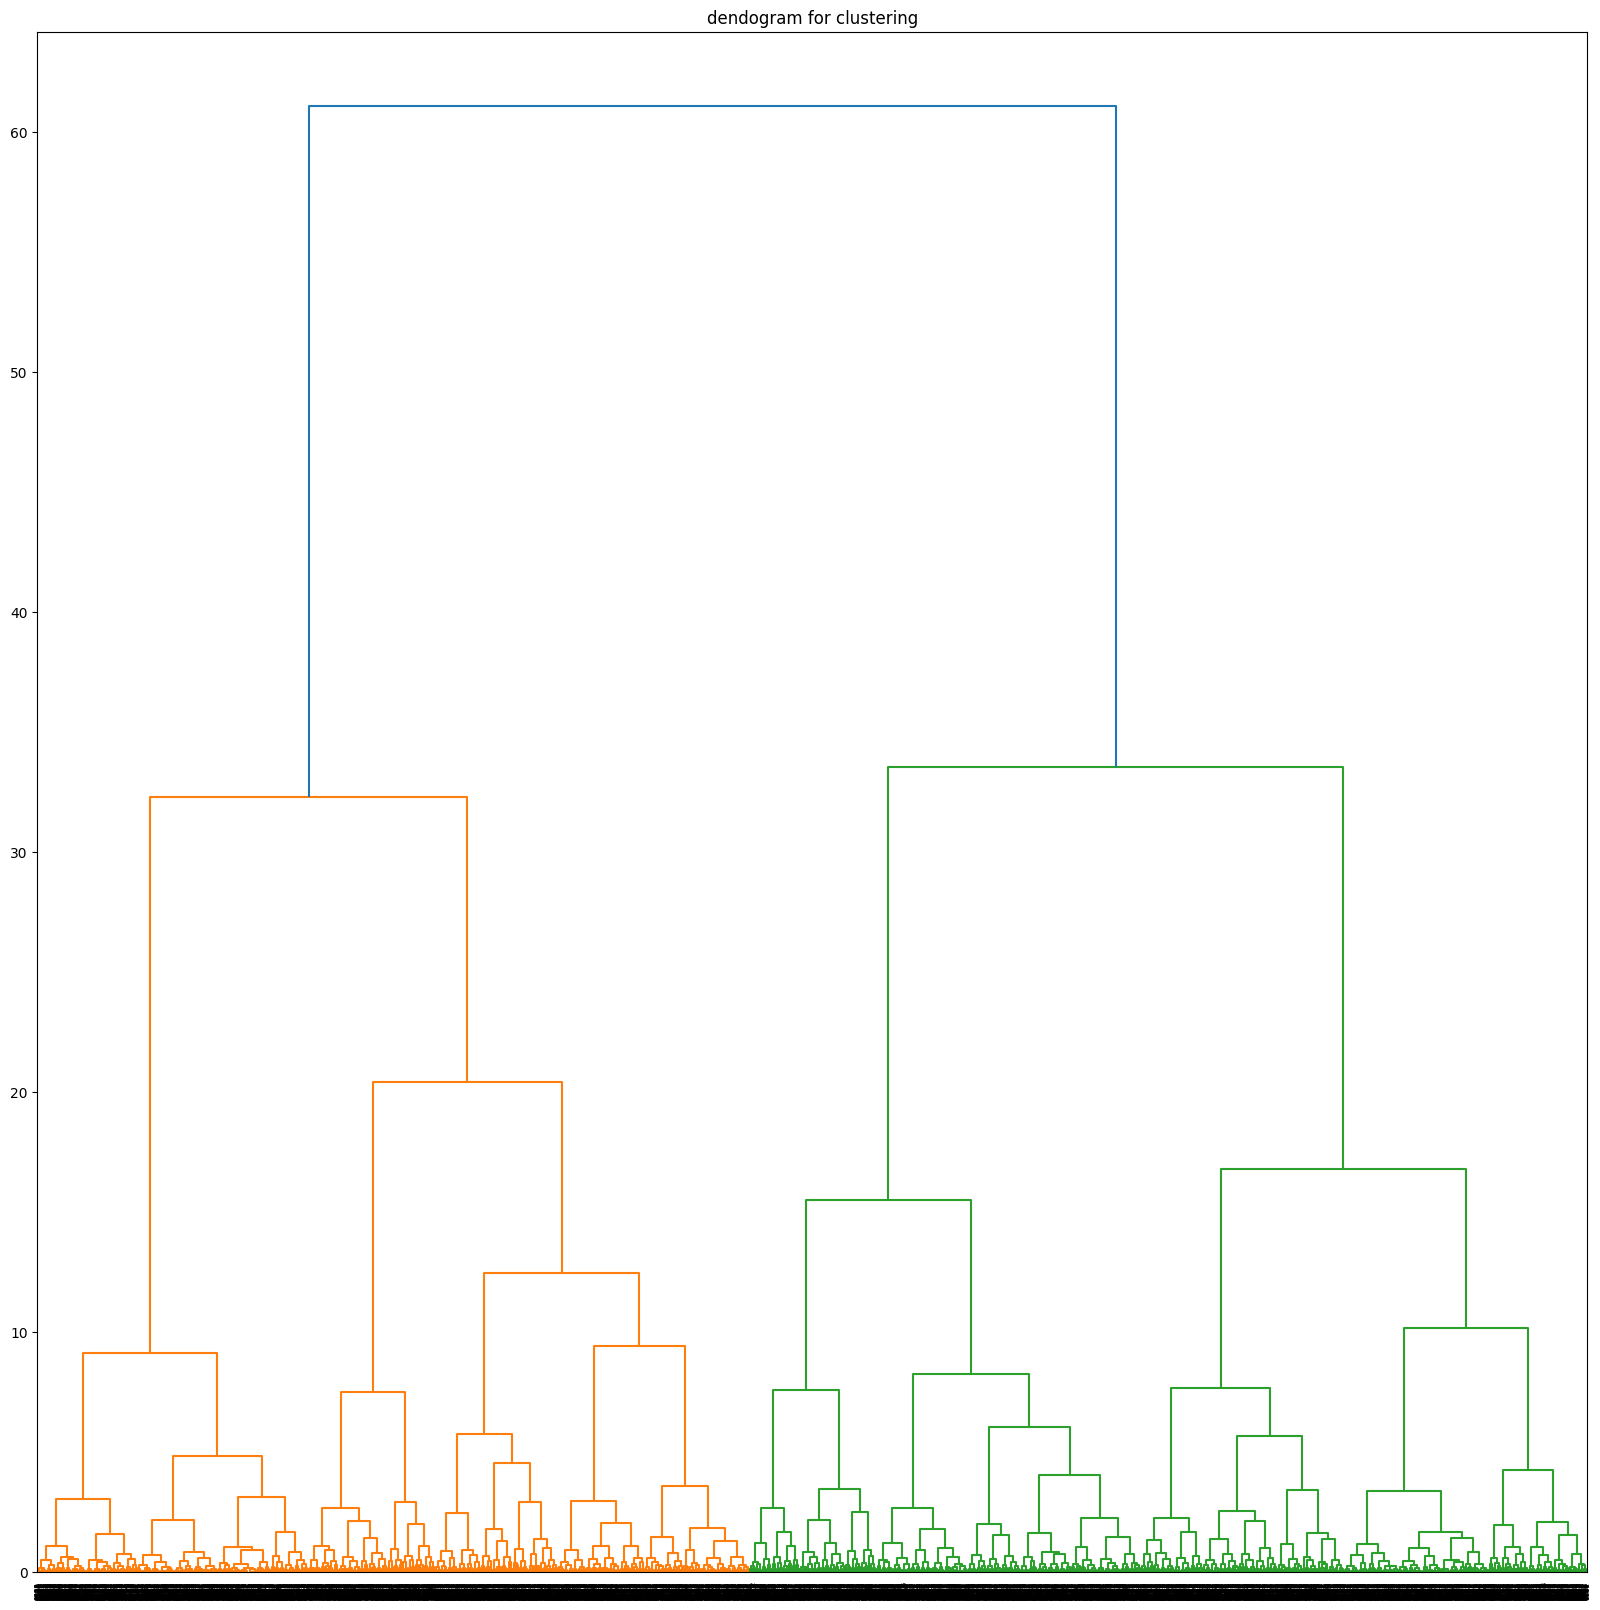

In [34]:
plt.figure(figsize=(20,20))
plt.title('dendogram for clustering')
shc.dendrogram(shc.linkage(df_principal, method='ward'))

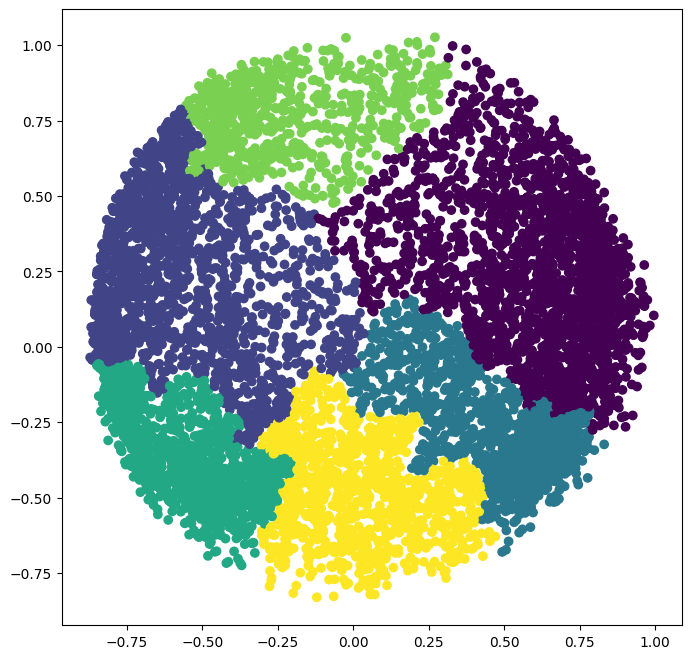

In [33]:
ac6 = AgglomerativeClustering(n_clusters = 6)
plt.figure(figsize=(8,8))
plt.scatter(df_principal['P1'], df_principal['P2'], c = ac6.fit_predict(df_principal))
plt.show()